In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Data Input

In [2]:
df=pd.read_csv('data.csv')
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-04,1177.500000,1189.400024,1177.500000,1186.800049,1186.800049,23.0
1,2015-05-05,1187.500000,1198.699951,1186.900024,1193.199951,1193.199951,38.0
2,2015-05-06,1194.500000,1194.599976,1189.900024,1190.300049,1190.300049,48.0
3,2015-05-07,1181.500000,1186.000000,1179.699951,1182.400024,1182.400024,14.0
4,2015-05-08,1183.300049,1189.099976,1182.900024,1189.099976,1189.099976,44.0
6,2015-05-11,1189.699951,1190.500000,1179.300049,1183.199951,1183.199951,51.0
7,2015-05-12,1194.599976,1194.800049,1189.699951,1192.599976,1192.599976,26.0
8,2015-05-13,1192.699951,1218.400024,1191.000000,1218.400024,1218.400024,10.0
9,2015-05-14,1214.500000,1225.599976,1214.500000,1225.400024,1225.400024,34.0
10,2015-05-15,1218.500000,1225.500000,1214.800049,1225.500000,1225.500000,35.0


# Visualization

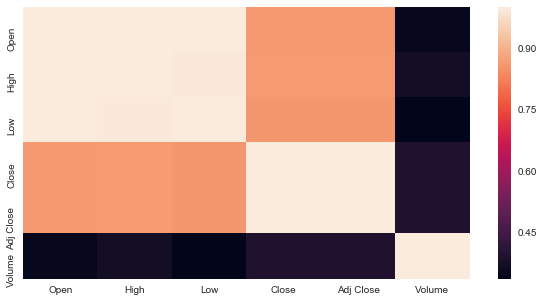

In [3]:
a=df.corr()
plt.figure(figsize=(10,5))
sb.heatmap(a)
ax=plt.gca()
ymin,ymax=ax.get_ylim()
ax.set_ylim([ymin+0.5,ymax-0.5]);

# Preprocessing

### Removing useless attributes

In [4]:
df.drop(columns=['Volume', 'Adj Close'], inplace=True)
df

,Date,Open,High,Low,Close
0,2015-05-04,1177.500000,1189.400024,1177.500000,1186.800049
1,2015-05-05,1187.500000,1198.699951,1186.900024,1193.199951
2,2015-05-06,1194.500000,1194.599976,1189.900024,1190.300049
3,2015-05-07,1181.500000,1186.000000,1179.699951,1182.400024
4,2015-05-08,1183.300049,1189.099976,1182.900024,1189.099976
...,...,...,...,...,...
1514,2020-04-27,1742.300049,1745.800049,1717.000000,1720.300049
1515,2020-04-28,1713.000000,1731.900024,1704.099976,1721.000000
1516,2020-04-29,1726.199951,1733.500000,1708.199951,1731.800049
1517,2020-04-30,1729.500000,1737.000000,1687.500000,1695.400024


### Train and Test 

In [5]:
from sklearn.model_selection import train_test_split 

In [6]:
X, y = df[df.columns[:-1]], df[df.columns[-1]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train

,Date,Open,High,Low
226,2016-01-29,1114.400024,1118.599976,1108.800049
231,2016-02-04,1142.500000,1157.599976,1141.000000
124,2015-09-29,1132.199951,1134.400024,1124.300049
590,2017-04-11,1254.500000,1273.500000,1254.500000
72,2015-07-29,1096.400024,1096.900024,1092.699951
...,...,...,...,...
927,2018-05-21,1287.400024,1292.099976,1287.400024
1015,2018-09-04,1193.800049,1193.800049,1189.900024
1417,2019-12-31,1513.800049,1523.400024,1513.800049
678,2017-07-26,1244.800049,1249.000000,1244.800049


### Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train2vals= MinMaxScaler().fit_transform(X_train[['Open', 'High', 'Low']])
X_train2 = pd.DataFrame(X_train2vals, columns = ['Open', 'High', 'Low'])
X_train2.index = X_train.index
X_train2['Date']=(X_train['Date'])
X_train2

,Open,High,Low,Date
226,0.625856,0.625335,0.638710,2016-01-29
231,0.641638,0.647138,0.657258,2016-02-04
124,0.635853,0.634168,0.647638,2015-09-29
590,0.704538,0.711930,0.722638,2017-04-11
72,0.615748,0.613204,0.629435,2015-07-29
...,...,...,...,...
927,0.723015,0.722328,0.741590,2018-05-21
1015,0.670448,0.667375,0.685426,2018-09-04
1417,0.850163,0.851632,0.872005,2019-12-31
678,0.699090,0.698233,0.717051,2017-07-26


In [11]:
X_test2vals= MinMaxScaler().fit_transform(X_test[['Open', 'High', 'Low']])
X_test2 = pd.DataFrame(X_test2vals, columns = ['Open', 'High', 'Low'])
X_test2.index = X_test.index
X_test2['Date']=(X_test['Date'])
X_test2

,Open,High,Low,Date
1445,0.903608,0.889948,0.891025,2020-02-04
1207,0.726460,0.719483,0.729837,2019-04-24
1088,0.699313,0.693084,0.702608,2018-11-29
612,0.701031,0.696074,0.704623,2017-05-08
171,0.612829,0.604411,0.614127,2015-11-23
...,...,...,...,...
1321,0.868499,0.855370,0.870128,2019-09-08
1377,0.833276,0.820679,0.833055,2019-11-12
743,0.737285,0.728791,0.739681,2017-10-11
1173,0.740779,0.729580,0.744574,2019-03-14


# Model Selection

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

Unscaled

In [13]:
linreg = LinearRegression().fit(X_train[['Open', 'High', 'Low']], y_train)
print('Test : ',(linreg.score(X_test[['Open', 'High', 'Low']], y_test)),'\nTrain: ',linreg.score(X_train[['Open', 'High', 'Low']], y_train))

Test :  0.7147166655192421 
Train:  0.758836560217734


Scaled

In [14]:
linreg2 = LinearRegression().fit(X_train2[['Open', 'High', 'Low']], y_train)
print('Test : ',(linreg2.score(X_test2[['Open', 'High', 'Low']], y_test)),'\nTrain: ', linreg2.score(X_train2[['Open', 'High', 'Low']], y_train))

Test :  0.7147664585412843 
Train:  0.7588365602177342


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dt = DecisionTreeRegressor().fit(X_train[['Open', 'High', 'Low']], y_train)
print('Test : ',dt.score(X_test[['Open', 'High', 'Low']], y_test),'\nTrain: ', dt.score(X_train[['Open', 'High', 'Low']], y_train))

Test :  0.9957507895683408 
Train:  0.9993156783657124


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf = RandomForestRegressor(n_estimators = 100).fit(X_train[['Open', 'High', 'Low']], y_train)
print('Test : ',rf.score(X_test[['Open', 'High', 'Low']], y_test),'\nTrain: ', rf.score(X_train[['Open', 'High', 'Low']], y_train))

Test :  0.9967879501839321 
Train:  0.9979303388970285


### Neural Network

In [19]:
from sklearn.neural_network import MLPRegressor

Unscaled

Adam

In [20]:
nn1 = MLPRegressor(alpha= 0.002, solver= 'adam', max_iter=10000, random_state = 0).fit(X_train[['Open', 'High', 'Low']], y_train)
print('Test : ',nn1.score(X_test[['Open', 'High', 'Low']], y_test),'\nTrain: ', nn1.score(X_train[['Open', 'High', 'Low']], y_train))

Test :  0.9933044738685809 
Train:  0.992770853706325


lbfgs

In [21]:
nn2 = MLPRegressor(alpha= 0.2, solver= 'lbfgs', max_iter=10000, random_state = 0).fit(X_train[['Open', 'High', 'Low']], y_train)
print('Test : ',nn2.score(X_test[['Open', 'High', 'Low']], y_test),'\nTrain: ', nn2.score(X_train[['Open', 'High', 'Low']], y_train))

Test :  0.9984285967786968 
Train:  0.9979803228911993


Scaled

Adam

In [22]:
nn3 = MLPRegressor(alpha= 0.2, solver= 'adam', max_iter=10000, random_state = 0).fit(X_train2[['Open', 'High', 'Low']], y_train)
print('Test : ',nn3.score(X_test2[['Open', 'High', 'Low']], y_test),'\nTrain: ', nn3.score(X_train2[['Open', 'High', 'Low']], y_train))

Test :  0.9878495766154054 
Train:  0.9930867450497616


D:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


lbfgs

In [23]:
nn4 = MLPRegressor(alpha= 0.2, solver= 'lbfgs', max_iter=10000, random_state = 0).fit(X_train2[['Open', 'High', 'Low']], y_train)
print('Test : ',nn4.score(X_test2[['Open', 'High', 'Low']], y_test),'\nTrain: ', nn4.score(X_train2[['Open', 'High', 'Low']], y_train))

Test :  0.9983736683725899 
Train:  0.9979970696087453


#### Unscaled lbfgs [nn2] performs the best on test case with score of 99.84%

# Test on New Data

In [24]:
dfn= pd.read_csv('unseen.csv')
dfn.dropna(inplace=True)
dfn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-02,1276.699951,1302.699951,1276.699951,1302.599976,1302.599976,25.0
2,2014-05-05,1305.599976,1314.199951,1305.500000,1309.000000,1309.000000,90.0
3,2014-05-06,1309.400024,1309.400024,1306.900024,1308.300049,1308.300049,31.0
4,2014-05-07,1310.300049,1312.000000,1288.000000,1288.599976,1288.599976,14.0
5,2014-05-08,1291.500000,1291.500000,1285.500000,1287.400024,1287.400024,21.0
...,...,...,...,...,...,...,...
299,2015-04-27,1182.300049,1206.699951,1181.400024,1203.300049,1203.300049,52.0
300,2015-04-28,1199.699951,1214.000000,1199.699951,1214.000000,1214.000000,194.0
301,2015-04-29,1211.199951,1212.599976,1201.900024,1209.800049,1209.800049,401.0
302,2015-04-30,1203.099976,1205.900024,1176.699951,1182.400024,1182.400024,114.0


In [25]:
t=dfn[['Open', 'High', 'Low']]
t_y= dfn['Close']

In [26]:
print(nn2.score(t,t_y))

0.9920364744610523


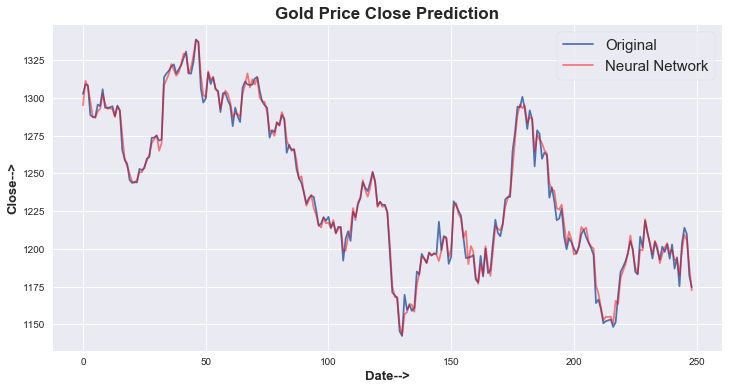

In [27]:
plt.figure(figsize=(12,6))
plt.plot(dfn['Close'].values, label="Original")
plt.plot(nn2.predict(t), c="r", alpha=0.5, label="Neural Network")
# plt.plot(nn1.predict(t), c="g", alpha=0.5)
plt.xlabel('Date-->', fontsize=13, fontweight='bold')
plt.ylabel('Close-->', fontsize=13, fontweight='bold')
plt.title("Gold Price Close Prediction", fontsize=17, fontweight='bold')
plt.legend(loc=1, frameon=True, fontsize=15)
plt.show();